#### Supervised learning is used whenever we want to predict a certain outcome from a given input

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
X,y = mglearn.datasets.make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) 

# 1-KNeighbors

### KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=8)
kn.fit(X_train,y_train)
y_pre=kn.predict(X_test)
kn.score(X_test,y_test)

0.8571428571428571

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


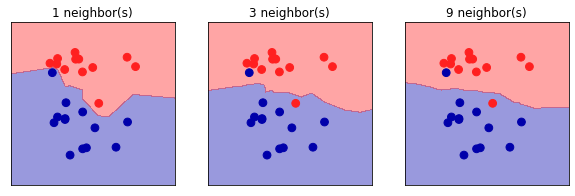

In [33]:
fig , axes = plt.subplots(1,3,figsize=(10,3))
from sklearn.neighbors import KNeighborsClassifier
X,y = mglearn.datasets.make_forge()
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True,ax=ax,alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y,s=60,cmap=mglearn.cm2)
    ax.set_title("%d neighbor(s)" %n_neighbors)
plt.show()

### KNeighbors Regression

In [6]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=6)
kn.fit(X_train,y_train)
y_pre=kn.predict(X_test)
kn.score(X_test,y_test)

0.5787037037037036

# 2-Ordinary Least Squares 

### Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

In [8]:
pol = PolynomialFeatures(degree=1)
Xn = pol.fit_transform(X_train)
reg = LinearRegression() 
reg.fit(Xn,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

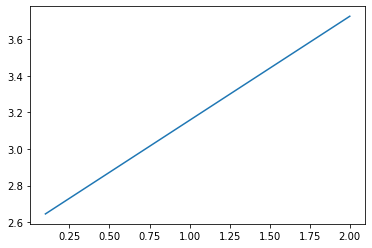

In [10]:
import numpy as np
X = np.linspace(0.1,2,100)
y = np.exp(X)/np.sqrt(X)+0.7*np.sin(3*X)
y_obs = y+np.random.normal(0,0.3,X.shape)
X=X[:,None]
pol = PolynomialFeatures(degree=1)
Xn = pol.fit_transform(X)
reg = LinearRegression() 
reg.fit(Xn,y_obs)
plt.plot(X,reg.predict(Xn))

### Linear Classification

1)LogisticRegression
 2)LinearSVC

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


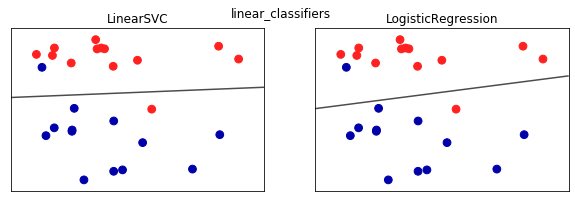

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
plt.suptitle("linear_classifiers")
for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    ax.scatter(X[:,0],X[:,1],c=y,s=60,cmap=mglearn.cm2)
    ax.set_title("%s" % clf.__class__.__name__)

### Linear Models for multiclass classification

(-10, 8)

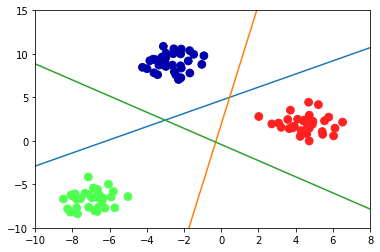

In [10]:
#one-vs-rest
X,y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=60,cmap=mglearn.cm3)
line = np.linspace(-15,15)
for coef, intercept in zip(linear_svm.coef_,linear_svm.intercept_):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1])
plt.ylim(-10,15)
plt.xlim(-10,8)

# 3-Navie Bayes Classifiers

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
model.score(X_test,y_test)

0.8571428571428571

# 4-Decision Trees

### Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2,random_state=0)
dtc.fit(X_train,y_train)
y_pretest = dtc.predict(X_test)
y_pretrain = dtc.predict(X_train)
print('accuracy test:',accuracy_score(y_pretest,y_test))
print('accuracy train:',accuracy_score(y_pretrain,y_train))
print('score:',dtc.score(X_test,y_test))
print(classification_report(y_pretest,y_test))

accuracy test: 0.7142857142857143
accuracy train: 1.0
score: 0.7142857142857143
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



### Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pre = dtr.predict(X_test)
print('score:',dtr.score(X_test,y_test))
print(classification_report(y_pre,y_test))

score: -0.16666666666666674
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



### Ensembles of Decision Tree 

### a) RandomForest

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
oob_score=False, random_state=2, verbose=0, warm_start=False)
forest.score(X_test,y_test)

0.8571428571428571

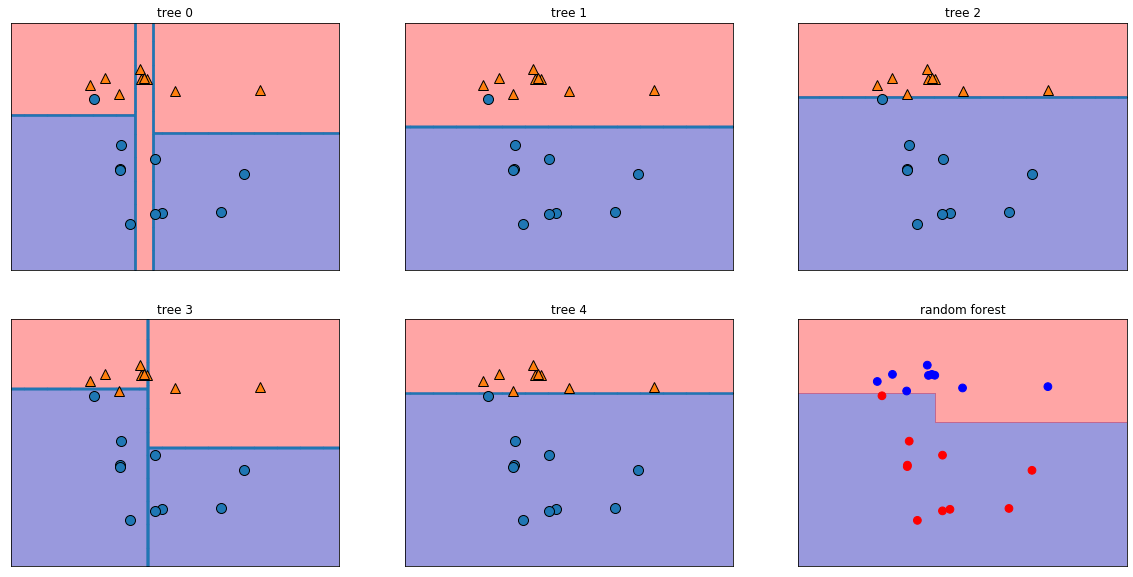

In [7]:
fig ,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60) 

### b) Gradient Boosted Regression Trees

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=0,learning_rate=0.001)
gbr.fit(X_train,y_train)
print('training score:',gbr.score(X_train,y_train))
print('testing score:',gbr.score(X_test,y_test))

training score: 1.0
testing score: 0.7142857142857143


# 5-Kernelized Support Vector Machines

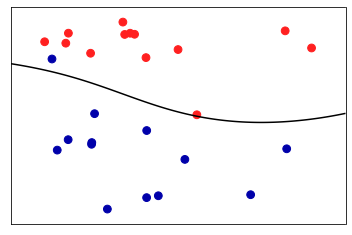

In [6]:
X,y= make_blobs(centers=4,random_state=8)
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# plot data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, cmap=mglearn.cm2)
# plot support vectors
#sv = svm.support_vectors_
#plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none', zorder=10, linewidth=3)

# 6-Neural Networks

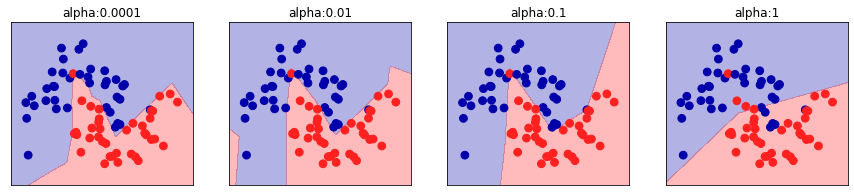

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
fig, axes = plt.subplots(1,4,figsize=(15,3))
for ax,alpha in zip(axes,[0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
        hidden_layer_sizes=[10,10],
        alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
        ax.set_title(f'alpha:{alpha}')